0. Przypomnij sobie, albo posłuchaj przypomnienia na wykładzie, czym jest rozkład normalny.

1. Wygeneruj milion liczb z rozkładu normalnego o średniej 0 i wariancji 1 używając funkcji
numpy.random.randn(...). Narysuj histogram takich danych.

2. Na histogramie wygenerowanych danych narysuj funkcję gęstości rozkładu prawdopodobieństwa. Porównaj histogram z funkcją gęstości.

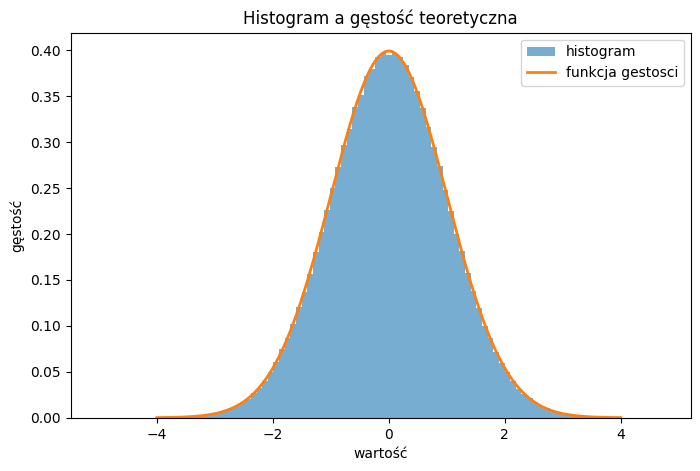

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

data = np.random.randn(1_000_000)

plt.figure(figsize=(8, 5))
plt.hist(data, bins=100, density=True, alpha=0.6, label="histogram")

x = np.linspace(-4, 4, 1000)
gest = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)
plt.plot(x, gest, linewidth=2, label="funkcja gestosci")

plt.xlabel("wartość")
plt.ylabel("gęstość")
plt.title("Histogram a gęstość teoretyczna")
plt.legend()
plt.show()


3. Przypomnij sobie pkt 3 z Zadania 1. Do atrybutów sepal length i sepal width dodaj zaburzenie losowe z rozkładem normalnym o średniej 0 i odchyleniu standardowym s = 0.25.

zadanie 3: Zrób wykres (typu scatter plot): na osi X sepal length, na osi Y sepal width. Czy jest
sens łączyć kropki na tym wykresie? Pokoloruj kropki trzema różnymi kolorami w zależności
od gatunku irysa. Ustaw rozmiar kropek proporcjonalnie do petal length (skalę rozmiarów
dobierz tak, aby rysunek był czytelny). Co ciekawego widać na tym wykresie? Czy potrafisz
wykorzystać wykres, żeby podać regułę odróżniania iris setosa od pozostałych dwóch gatunków
irysa?

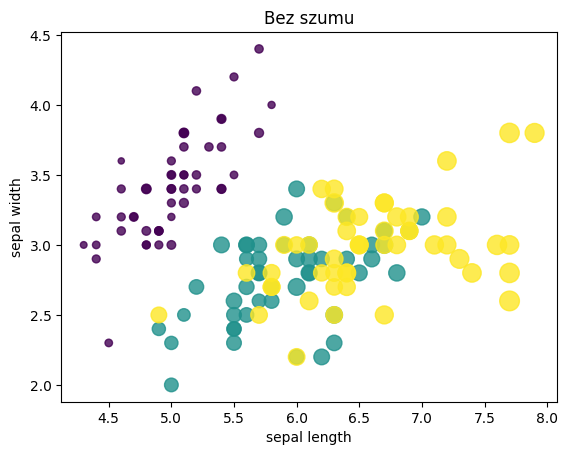

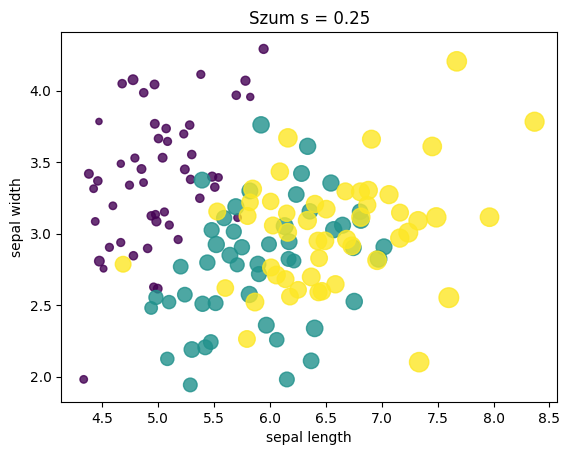

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = "iris.data"

cols = ["sepal_len", "sepal_wid", "petal_len", "petal_wid", "class"]
df = pd.read_csv(path, header=None, names=cols)

sep_len = df["sepal_len"]
sep_wid = df["sepal_wid"]
pet_len = df["petal_len"]

class_num = df["class"].map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})
size = 20 + 180 * (pet_len - pet_len.min()) / (pet_len.max() - pet_len.min())

plt.figure()
plt.scatter(sep_len, sep_wid, c=class_num, s=size, alpha=0.8)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Bez szumu")
plt.show()

s = 0.25
sep_len_noise = sep_len + np.random.normal(0.0, s, size=len(sep_len))
sep_wid_noise = sep_wid + np.random.normal(0.0, s, size=len(sep_wid))

plt.figure()
plt.scatter(sep_len_noise, sep_wid_noise, c=class_num, s=size, alpha=0.8)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title(f"Szum s = {s}")
plt.show()
